In [1]:
# Must have imports
import helper
from analyzer import Analyzer, group_tweets_by_calendar_week
from crawler import Crawler
from plotter import Plotter
from model import Vader

# Extra imports
import datetime
import os
import json

In [2]:
# Sample Config
config = {
	"user_auth": False, # autheticate as user or application
    "search": {
        "location": "darmstadt", # based on helper.GEOCODES dictionary
        "radius": 100, # optional default to 100
        "query": ['der, die, das'], # query for searching (str array), either query or location has to be not empty
        "max_searches": 5000, # Default: 1000 max amount of searches 
        "num_results": 5000, # number of results with defined filter options
        "rate_limit": True,  # Default True: to turn off rate limit prints
        "filter": { # Filter applies to search
            "not_reply": True, # Filters for not replies when true, does nothing when false
            "not_retweet": True, # Filters for not retweets when true, does nothing when false
            "until": datetime.datetime(2020, 3, 1), # None or datetime (e.g. datetime.datetime(2020, 5, 20))
        }
    },
    "analyze_sentiment": {
      "pos_boundary": 0.8, # boundary for classifying tweets as "extremely" positive
        "neg_boundary": 0.7 # boundary for classifying tweets as "extremely" negative
    },
	"get_user": { # Optional, only when querying for users
		"good_user": True, # mandatory
		"search_type": "recent_user", # 'recent_user', 'recent_retweeted_user'
		"num_users": 30, # mandatory
        "unique_ids": True, # If true will remember user ids in session
	},
	"plot": {
		"title": "Testing",
        "group_by": 3, # number of days of each group in the histogramm
        "end_date": datetime.datetime(2020,6,26), # last day included in the analysis
        "start_date": datetime.datetime(2020,3,1) # first day included in the analysis
	},
    # Full search not tested and should only be used with caution!
    "full_search": {
        "query": "#Corona lang:de", # the query used for full search
        "env_name": "dev", # your premium environment name
        "fromDate": "2020" + "01" + "15" + "1200", # Format: YYYYMMDDHHmm
        "toDate": "2020" + "06" + "01" + "1200"
    },
    # A full scan over 3 areas each hour, should run continuous
    "full_scan": {
        "active": True,
        "path": "saved_data/full_scan/",
        "locations": ["scan_1", "scan_2", "scan_3"], # All locations used by the scan
    }
}



config = helper.init_config(config_dict)
crawler = Crawler(config)
vader_model = Vader()
analyzer = Analyzer(config, vader_model)
sentiment_pos_limit = 0.7
sentiment_neg_limit = -0.7

In [4]:
recent_users = crawler.get_recent_users()

remaining requests: 449
tweets remaining: ~ 6735
reset at: 2020-06-24 16:05:55
reset in: 14:59


In [5]:
tweets_of_recent_users = crawler.get_timeline_tweets_from_user_list(recent_users)

Checked Tweets: 107
remaining requests: 1494
tweets remaining: ~ 22410
reset at: 2020-06-24 16:05:59
reset in: 14:56
Checked Tweets: 546
remaining requests: 1466
tweets remaining: ~ 21990
reset at: 2020-06-24 16:05:59
reset in: 14:44
Checked Tweets: 1000
remaining requests: 1415
tweets remaining: ~ 21225
reset at: 2020-06-24 16:05:59
reset in: 14:22
Checked Tweets: 1000
remaining requests: 1365
tweets remaining: ~ 20475
reset at: 2020-06-24 16:05:59
reset in: 14:03
Checked Tweets: 1000
remaining requests: 1315
tweets remaining: ~ 19725
reset at: 2020-06-24 16:05:59
reset in: 13:43
Checked Tweets: 210
remaining requests: 1303
tweets remaining: ~ 19545
reset at: 2020-06-24 16:05:59
reset in: 13:39
Checked Tweets: 1000
remaining requests: 1253
tweets remaining: ~ 18795
reset at: 2020-06-24 16:05:59
reset in: 13:19
Checked Tweets: 1000
remaining requests: 1203
tweets remaining: ~ 18045
reset at: 2020-06-24 16:05:59
reset in: 12:56
Checked Tweets: 238
remaining requests: 1191
tweets remaini

In [6]:
flattened_tweet_list = [tweet for timeline in tweets_of_recent_users for tweet in timeline]

/home/nina/anaconda3/envs/code/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nina/anaconda3/envs/code/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


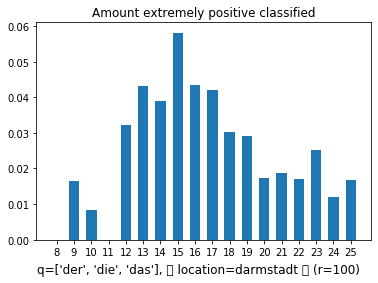

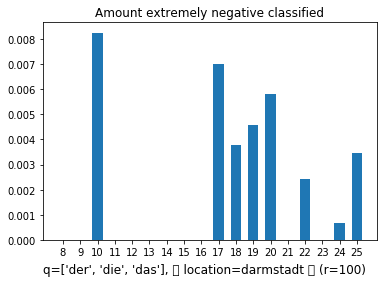

In [4]:
analyzer.analyze_and_plot_sentiment_per_week(flattened_tweet_list, sentiment_pos_limit, sentiment_neg_limit)